<a href="https://colab.research.google.com/github/destrospooder/basil-data/blob/main/datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'timestamp': datetime.datetime(2020, 11, 25, 0, 13, 11, 604000), 'value': 58.8}
{'timestamp': datetime.datetime(2020, 11, 25, 0, 28, 28, 390000), 'value': 57.4}
{'timestamp': datetime.datetime(2020, 11, 25, 0, 43, 48, 389000), 'value': 60.8}
{'timestamp': datetime.datetime(2020, 11, 25, 0, 59, 0, 690000), 'value': None}
{'timestamp': datetime.datetime(2020, 11, 25, 1, 14, 15, 790000), 'value': None}
{'timestamp': datetime.datetime(2020, 11, 25, 1, 30, 40, 988000), 'value': 58}
{'timestamp': datetime.datetime(2020, 11, 25, 1, 45, 52, 790000), 'value': 57.6}
{'timestamp': datetime.datetime(2020, 11, 25, 2, 1, 10, 109000), 'value': 55.7}
{'timestamp': datetime.datetime(2020, 11, 25, 2, 16, 26, 589000), 'value': 56.7}
{'timestamp': datetime.datetime(2020, 11, 25, 2, 31, 46, 990000), 'value': 55.4}
{'timestamp': datetime.datetime(2020, 11, 25, 2, 47, 3, 689000), 'value': 56.4}
{'timestamp': datetime.datetime(2020, 11, 25, 3, 2, 16, 989000), 'value': 55.1}
{'timestamp': datetime.datetime(20

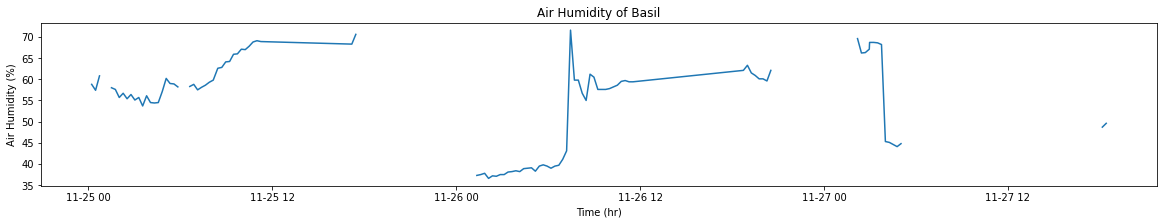

In [ ]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

response=requests.get("https://cusap-iot.uc.r.appspot.com/system/listSystems")
response_dict=response.json()

system_dictionary = {}
for system in response_dict["_msg"]["payload"]:
  system_dictionary[system["name"]] = system["_id"]

hydrokit = system_dictionary["Minh beautiful box"]

humidity = {"systemId": hydrokit, "timePeriod": "hour", "reading": "Air-Humidity"}
data = requests.get("https://cusap-iot.uc.r.appspot.com/system/getReadings", params = humidity)

humidity_d = data.json()
indiv_data = humidity_d["_msg"]["payload"]

for i in range(0, len(indiv_data)):
  del indiv_data[i]["_id"]
  del indiv_data[i]["system"]
  del indiv_data[i]["issue"]
  indiv_data[i]["timestamp"] = datetime.strptime(indiv_data[i]["timestamp"], "%Y-%m-%dT%H:%M:%S.%fZ")
  print(indiv_data[i])

hour_change = pd.DataFrame.from_records(indiv_data).groupby(["timestamp"]).mean()
plot_data = hour_change.to_numpy()

plt.figure(figsize=(20,3))
plt.title("Air Humidity of Basil")
plt.xlabel("Time (hr)")
plt.ylabel("Air Humidity (%)")
plt.plot(hour_change.index, plot_data)
plt.show()